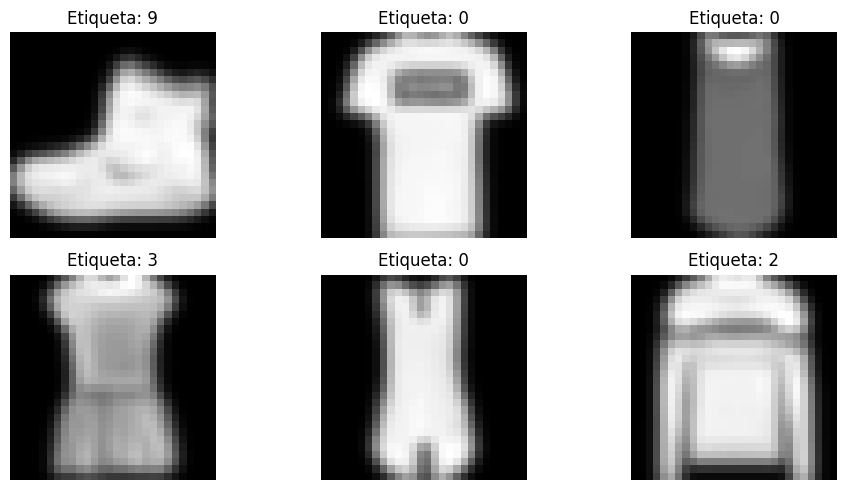

In [3]:
# 1. Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from scipy.ndimage import gaussian_filter

# 2. Cargar el dataset Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 3. Aplicar solo Suavizado Gaussian
def apply_gaussian_blur(images, sigma=1.0):
    blurred_images = []
    for img in images:
        img_blur = gaussian_filter(img, sigma=sigma)  # Aplicar suavizado
        img_blur = img_blur / (img_blur.max() + 1e-8)  # Normalización
        blurred_images.append(img_blur)
    return np.array(blurred_images)

# Aplicar el suavizado
X_train_blur = apply_gaussian_blur(X_train)
X_test_blur = apply_gaussian_blur(X_test)

# 4. Preprocesamiento final
X_train_blur = X_train_blur.reshape(-1, 28, 28, 1).astype('float32')
X_test_blur = X_test_blur.reshape(-1, 28, 28, 1).astype('float32')

# 5. Visualización de algunas imágenes procesadas
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train_blur[i].reshape(28,28), cmap='gray')
    plt.title(f'Etiqueta: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.6247 - loss: 1.0508 - val_accuracy: 0.8196 - val_loss: 0.4862
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8093 - loss: 0.5239 - val_accuracy: 0.8522 - val_loss: 0.4025
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.8364 - loss: 0.4479 - val_accuracy: 0.8631 - val_loss: 0.3719
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.8527 - loss: 0.4056 - val_accuracy: 0.8707 - val_loss: 0.3507
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.8611 - loss: 0.3818 - val_accuracy: 0.8734 - val_loss: 0.3429
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.8635 - loss: 0.3757 - val_accuracy: 0.8812 - val_loss: 0.3176
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 119ms/step - accuracy: 0.8736 - loss: 0.3475 - val_accuracy: 0.8811 - val_loss: 0.3187
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.8755 - loss: 0

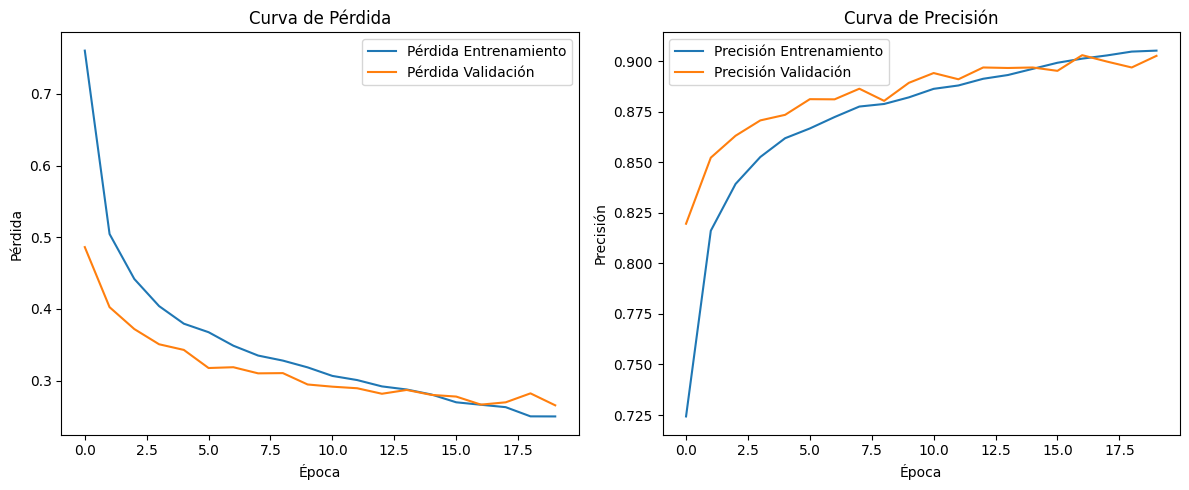

In [4]:
# 6. Construcción del modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 7. Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 8. Entrenamiento del modelo
history = model.fit(X_train_blur, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# 9. Evaluación del modelo
loss, accuracy = model.evaluate(X_test_blur, y_test, verbose=0)
print(f"Pérdida en Test: {loss:.4f}")
print(f"Precisión en Test: {accuracy:.4f}")

# 10. Gráficas de desempeño
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


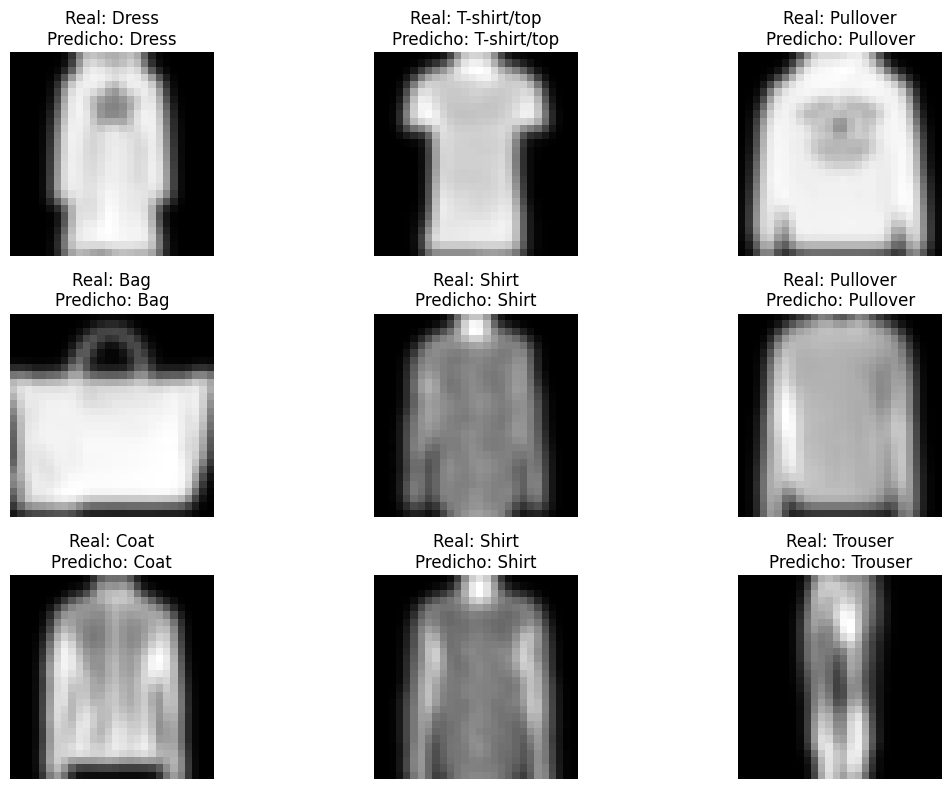

In [5]:
# Mostrar predicciones del modelo sobre imágenes de prueba
import random

# Predicciones
y_pred = model.predict(X_test_blur)
y_pred_classes = np.argmax(y_pred, axis=1)

# Etiquetas de clases de Fashion-MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualizar algunas predicciones
plt.figure(figsize=(12,8))
for i in range(9):
    idx = random.randint(0, len(X_test_blur)-1)
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_blur[idx].reshape(28,28), cmap='gray')
    plt.title(f"Real: {class_labels[y_test[idx]]}\nPredicho: {class_labels[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


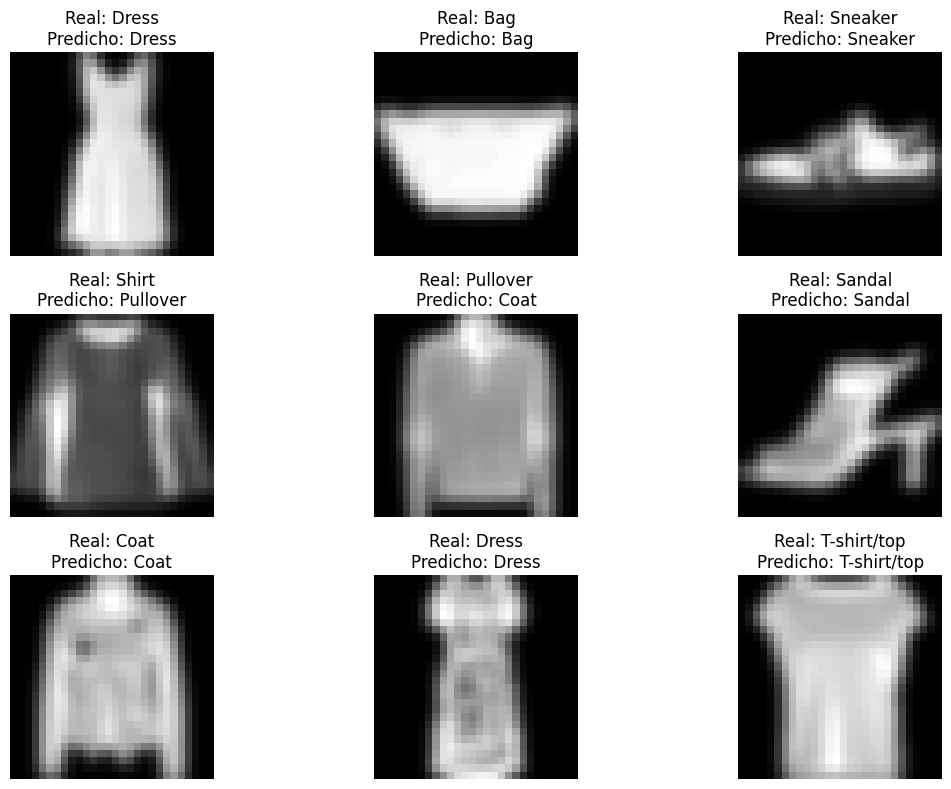

In [7]:
# Mostrar predicciones del modelo sobre imágenes de prueba

# Obtener predicciones
y_pred = model.predict(X_test_blur)
y_pred_classes = np.argmax(y_pred, axis=1)  # Clase con mayor probabilidad

# Etiquetas de clases de Fashion-MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualizar algunas predicciones
plt.figure(figsize=(12,8))
for i in range(9):
    idx = random.randint(0, len(X_test_blur) - 1)
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_blur[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {class_labels[y_test[idx]]}\nPredicho: {class_labels[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()